In [ ]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [ ]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [ ]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [ ]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [ ]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


In [ ]:
football = football.drop('Combined')
football.group('Team', np.average)

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227


In [ ]:
observed_means = football.group('Team', np.average).column(1)

observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

In [ ]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(football, 'Team')

0.733522727272728

In [ ]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

Team,Pressure Drop,Shuffled Label
Patriots,0.85,Colts
Patriots,1.475,Patriots
Patriots,1.175,Colts
Patriots,1.65,Patriots
Patriots,1.225,Patriots
Patriots,0.725,Patriots
Patriots,0.425,Patriots
Patriots,1.175,Patriots
Patriots,1.35,Patriots
Patriots,1.8,Patriots


In [ ]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.3585227272727276

In [ ]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

In [ ]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')

In [ ]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

Observed Difference: 0.733522727272728


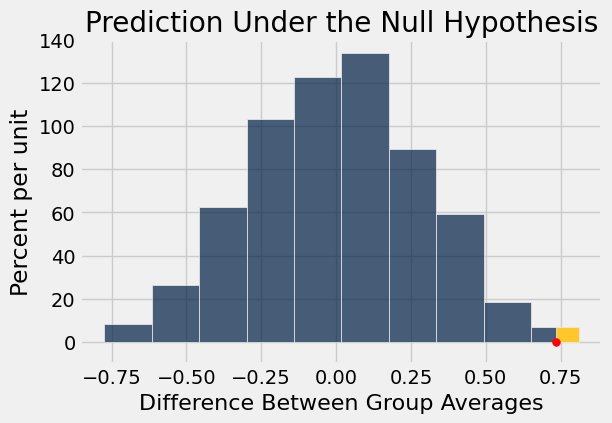

In [ ]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

In [ ]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0035